# Task 3.2 : Mean squared-loss logistic regression

In our lectures we have covered using the log-likelihood loss function for logistic regression, but it is of course possible to use a wide range of loss functions. Consider for example the mean squared loss below which is common for regression tasks, but can also be applied for binary classification:

\begin{equation*}
\mathscr{L} = \frac{1}{n} \sum_{i=1}^n \frac{(y_i-\hat{y}_i)^2}{2}
\end{equation*}

In [45]:
#Importing libraries
import numpy as np
from matplotlib import pyplot as plt
from helpers import load_all_data, vectorized_flatten, sigmoid, gradient_update

In [46]:
def prep_data(data_path):
    """
    Prepare data
    Use vectorized flatten
    --------------------
    return: train, validation, and test splits
    --------------------
    """
    # Load
    x_train, y_train, x_dev, y_dev, x_test, y_test = load_all_data(data_path)
    
    # Flatten
    x_train_flattened = vectorized_flatten(x_train)
    x_dev_flattened = vectorized_flatten(x_dev)
    x_test_flattened = vectorized_flatten(x_test)
    
    # Reshape labels
    y_train = y_train.reshape(1, -1)
    y_dev = y_dev.reshape(1, -1)
    y_test = y_test.reshape(1, -1)
    
    # Return
    return(x_train_flattened, x_dev_flattened, x_test_flattened, y_train, y_dev, y_test)

In [149]:
data_path = '../setup/data'
x_train_flattened, x_dev_flattened, x_test_flattened, y_train, y_dev, y_test = prep_data(data_path)
print(x_train_flattened.shape)
print(x_train_flattened[:, 10].reshape(-1, 1).shape)

(784, 12000)
(784, 1)


In [95]:
def predict(w: np.array, x: np.array, b: float) -> np.array:
        """
        Calculate the output predictions of sigmoid function:
        --------------------
        w: weights, of shape (1, 784)
        x: input data, of shape (784, n=12000)
        b: bias
        --------------------
        return: the predictions
        """
        activation_function_input = w@x + b
        
        return sigmoid(activation_function_input)

In [96]:
def gradient(x: np.array, y:np.array, w: np.array, b: float)-> (np.array, np.array):
        """
        Calculate the gradients: dw and db by using the answers from 1
        --------------------
        x: input data, of shape (784, n=12000)
        y: true label vector, of shape (1, n)
        --------------------
        return: derivatives of loss function: L with respect to weight: w and bias: b
        """
        # obtain number of samples
        n = max(y.shape)
        
        # predictions on entire data
        preds = predict(w, x, b)
        
        # derivative of loss function w.r.t. sigmoid function expressed as 'a'
        da = preds - y
        
        # derivative of loss function w.r.t. z (= w^Tx+b)
        dz = da * preds * (1 - preds)
        
        # derivative of loss function w.r.t. w
        dw = np.dot(dz, x.T)/n
        
        # derivative of loss function w.r.t. b
        db = np.sum(dz)/n
        
        return (dw, db)

In [97]:
def mean_squared_loss(y: np.array, y_pred: np.array) -> np.array:
        """
        Calculate the mean squared error.
        --------------------
        y: true label vector, of shape (1, n)
        y_pred: predicted label vector, of shape (1, n)
        --------------------
        return: mean squared loss
        """
        n = max(y.shape)
        return (y-y_pred)**2/(2*n)

In [238]:
 def finite_differences(x: np.array, y: np.array, w: np.array, b: float, epsilon=1e-7) -> (float, float):
        # derive the loss function w.r.t. w and b respectively using the helper function 'gradient'
        dw, db = gradient(x, y, w, b)
        
        w_plus = np.copy(w) 
        w_minus = np.copy(w)
        
        fd_dw = np.copy(w)
        print(fd_dw.shape)

        for i in range(len(w)):
            # add and subtract epsilon/2 from weights
            w_plus[i] += epsilon
                
            # predictions with w_plus and w_minus
            preds_w_plus = predict(w_plus, x, b)
            
            w_plus[i] -= 2*epsilon
            preds_w_minus = predict(w_plus, x, b)
            
            w_plus[i] += epsilon

            # calculate MSE using the helper function 'mean_squared_loss'
            loss_w_plus = np.sum(mean_squared_loss(y, preds_w_plus))
            loss_w_minus =  np.sum(mean_squared_loss(y, preds_w_minus))

            # calculate the right hand side of the finite difference equation
            fd_dw[i] = (loss_w_plus - loss_w_minus)/(2*epsilon)

        # subtract the right hand side of the finite difference equation from the left
        w_difference = np.linalg.norm(dw-fd_dw) #np.sum(dw) -np.sum(fd_dw)
        print(w_difference)
        
        biases = b
        
        fd_db = b
        
#         for i in range(len(b)):
        # add and subtract epsilon/2 from weights
        biases += epsilon

        # predictions with w_plus and w_minus
        preds_b_plus = predict(w_plus, x, biases)

        biases -= 2*epsilon
        preds_b_minus = predict(w_plus, x, biases)

        biases += epsilon

        # calculate MSE using the helper function 'mean_squared_loss'
        loss_biases_plus = np.sum(mean_squared_loss(y, preds_b_plus))
        loss_biases_minus =  np.sum(mean_squared_loss(y, preds_b_minus))

        # calculate the right hand side of the finite difference equation
        biases = (loss_biases_plus - loss_biases_minus)/(2*epsilon)

        # subtract the right hand side of the finite difference equation from the left
        b_difference = np.linalg.norm(db-biases) #np.sum(dw) -np.sum(fd_dw)
        print(b_difference)

        return
    
        
#         # derive the loss function w.r.t. w and b respectively using the helper function 'gradient'
#         dw, db = gradient(x, y, w, b)
        
#         # add and subtract epsilon/2 from weights
#         w_plus = np.copy(w) 
#         w_minus = np.copy(w)
        
#         w_plus += epsilon/2
#         w_minus -= epsilon/2
        
#         # predictions with w_plus and w_minus
#         preds_w_plus = predict(w_plus, x, b)
#         preds_w_minus = predict(w_minus, x, b)
        
#         # calculate MSE using the helper function 'mean_squared_loss'
#         loss_w_plus = mean_squared_loss(y, preds_w_plus)
#         loss_w_minus =  mean_squared_loss(y, preds_w_minus)
        
#         # calculate the right hand side of the finite difference equation
#         fd_dw = (loss_w_plus - loss_w_minus)/(epsilon)
        
#         # subtract the right hand side of the finite difference equation from the left
#         difference_w = np.sum(dw) - np.sum(fd_dw)
        
        
#         # add and subtract epsilon/2 from bias
#         b_plus = b
#         b_minus = b
        
#         b_plus += epsilon/2
#         b_minus -= epsilon/2
        
#         # predictions with b_plus and b_minus
#         preds_b_plus = predict(w, x, b_plus)
#         preds_b_minus = predict(w, x, b_minus)
    
#         # calculate MSE using the helper function 'mean_squared_loss'
#         loss_b_plus = mean_squared_loss(y, preds_b_plus)
#         loss_b_minus = mean_squared_loss(y, preds_b_minus)
        
#         # calculate the right hand side of the finite difference equation
#         fd_db = (loss_b_plus - loss_b_minus)/(epsilon)
        
#         # subtract the right hand side of the finite difference equation from the left
#         difference_b = np.sum(db) - np.sum(fd_db)
        
#         return (difference_w, difference_b)

In [239]:
# finite_differences(x_train_flattened, y_train, np.zeros((x_train_flattened.shape[0], )), 0)
# print(x_train_flattened[:, 10].reshape(-1,1).shape, y_train[:, 10].reshape(-1,1).shape)
finite_differences(x_train_flattened[:, 10].reshape(-1,1), y_train[:, 10].reshape(-1,1), np.zeros((x_train_flattened.shape[0], )), 0.0)
# print("For analytical gradient w.r.t. w:", a ,"= {:.15f}".format(float(a)))
# print("For analytical gradient w.r.t. b:", b ,"= {:.15f}".format(float(b)))

(784,)
1.1031362443390238e-08
5.515170542480519e-10


In [197]:
def accuracy(y, y_pred):
    """
    Calculate the accuracy on given data.
    --------------------
    y: true label vector, of shape (1, n)
    y_pred: predicted label vector, of shape (1, n)
    --------------------
    return: accuracy
    """
    n = max(y_pred.shape)
    correct = np.sum(np.where(y == y_pred, 1.0, 0.0))
    return correct/n

In [64]:
def train(x: np.array, y: np.array, x_dev: np.array, y_dev: np.array, w: np.array, b: float, n_epochs: int, learning_rate: float, n_limit: int) -> (list, list, list):
        """
        Train the model to convergence.
        --------------------
        x: input training data, of shape (784, n=12000)
        y: true training label vector, of shape (1, n)
        x_dev: input validation data, of shape (784, m =1000)
        y_dev: true validation label vector, of shape (1, m)
        w: weights, of shape (1, 784)
        b: bias
        n_epochs: number of times training the data
        learning_rate: learning rate
        n_limit: number of epochs for which we would consider the process to have converged
        --------------------
        return: lists of training losses, accuracies on training data and accuracies on validation data
        """
        # count the number of validation loss increments
        counter = 0
        
        # store training square loss, accuracy on the training set and accuracy on the validation set for each epoch
        training_losses = []
        validation_losses = []
        training_accuracies = []
        validation_accuracies = []
        weights = []
        biases = []
        
        for i in range(n_epochs):
            # predictions on training data
            preds = predict(w, x, b)
            
            # gradients w.r.t. w and b
            dw, db = gradient(x, y, w, b)
            
            # update the model parameters, w and b, and store them in corresponding lists
            w = gradient_update(w, learning_rate, dw)
            b = gradient_update(b, learning_rate, db)
            
            weights.append(w)
            biases.append(b)
            
            # calculate training loss and append to the list, training_losses
            training_loss = np.sum(mean_squared_loss(y, preds))
            training_losses.append(training_loss)
            
            # calculate training accuracy and append to the list, training_accuracies
            training_accuracy = accuracy(y, np.where(preds >= 0.5, 1.0, 0.0))
            training_accuracies.append(training_accuracy)
            
            # predictions on validation data
            preds_dev = predict(w, x_dev, b)
            
            # calculate validation accuracy and append to the list, validation_accuracies
            validation_accuracy = accuracy(y_dev, np.where(preds_dev >= 0.5, 1.0, 0.0))
            validation_accuracies.append(validation_accuracy)
            
            # calculate validation loss and append to the list, validation_losses
            validation_loss = np.sum(mean_squared_loss(y_dev, preds_dev))
            validation_losses.append(validation_loss)
            
            # increment the counter if validation loss is greater than previous one 
            if i > 0 and validation_loss > prev_validation_loss:
                counter += 1
            
            # break the loop if the validation loss increases for "n_limit" epochs
            if counter == n_limit:
                print("The model has converged after", i+1, "epochs.")
                break
            
            # store the current validation loss for the next iteration
            prev_validation_loss = validation_loss
        
        print("The model has converged after", n_epochs, "epochs.")
        
        return (training_losses, validation_losses, training_accuracies, validation_accuracies, weights, biases)

In [248]:
# Establish a “grid” based on intuitions regarding the logistic regression model.
def grid_search(x: np.array, y: np.array, x_dev: np.array, y_dev: np.array, w: np.array, b: float, n_epochs: int, n_limit: int):
    """
    Grid search on the model.
    --------------------
    x: input training data, of shape (784, n=12000)
    y: true training label vector, of shape (1, n)
    x_dev: input validation data, of shape (784, m =1000)
    y_dev: true validation label vector, of shape (1, m)
    w: weights, of shape (1, 784)
    b: bias
    n_epochs: number of times training the data
    n_limit: number of epochs for which we would consider the process to have converged
    --------------------
    return: None
    """
    learningrates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    min_loss = float('inf')
    max_accuracy = float('-inf')

    for i, learningrate in enumerate(learningrates):
        # Tain and evaluate the model with the given parameters on the validation set.
        losses, validation_losses, training_accuracies, validation_accuracies, weights, biases = train(x_train_flattened, y_train, x_dev_flattened, y_dev, np.zeros((x_train_flattened.shape[0], )), 0, 500, learningrate, 5)

        # Find the minimum validation loss and the maximum validation accuracy with current learningrate
        validation_loss = np.amin(validation_losses)
        validation_accuracy = np.amax(validation_accuracies)

#         print("Validation loss:", validation_loss, "Validation Accuracy:", validation_accuracy)
        
        # Update the minimum loss and the maximum accuracy as well as the corresponding learning rate, w and b
        if validation_loss < min_loss and validation_accuracy > max_accuracy:
            min_loss = validation_loss
            max_accuracy = validation_accuracy
            lr = learningrate
            (a, b,c,d,e,f) = (losses, validation_losses, training_accuracies, validation_accuracies, weights, biases)
            
    # Print the learning rate that produces the best performance of the model
    print("Learning rate:", lr)
    
    # Print weights and bias of the model with the best performance on validation data
#     print("Weights:", e, "Bias", f)
    return (a, b,c,d,e,f)

In [249]:
def plot(y_values, xlabel, ylabel, title, output_path, n_epochs):
    epochs = range(1, n_epochs+1)

    plt.figure()
    plt.plot(epochs, y_values, linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
#         plt.show()
    plt.savefig(output_path)

The model has converged after 500 epochs.
Weights that minimise the MSE of the model:  [[-1.19533279e-02 -1.19081835e-02 -1.14719831e-02 -1.10210680e-02
  -9.64005263e-03 -6.96497585e-03 -4.52628332e-03  1.11808029e-03
   7.37520541e-03  1.46778911e-02  2.34253414e-02  3.27185591e-02
   3.88622607e-02  4.51524551e-02  4.21149159e-02  2.09359951e-02
   1.24674246e-03 -6.51513942e-03 -3.75655811e-03 -1.72667142e-03
  -6.34414327e-03 -8.55137477e-03 -6.78257019e-03 -8.79407159e-03
  -1.07691360e-02 -1.08238783e-02 -1.25145902e-02 -1.18722305e-02
  -1.19408666e-02 -1.16056932e-02 -1.07139185e-02 -7.04663761e-03
  -1.18184900e-03  8.90622285e-03  1.88725902e-02  3.39776610e-02
   4.96187431e-02  7.01762327e-02  9.23651489e-02  1.08344052e-01
   1.17570960e-01  1.21397562e-01  1.03201500e-01  5.91593257e-02
   3.04272854e-02  1.59963537e-02  1.54397090e-02  1.81419091e-02
   1.20841556e-02  6.05664657e-03  2.45977000e-03 -1.71351391e-03
  -3.72829202e-03 -1.78912357e-03 -8.54396219e-03 -1.16

The model has converged after 500 epochs.
The model has converged after 500 epochs.
The model has converged after 500 epochs.
The model has converged after 7 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
The model has converged after 11 epochs.
The model has converged after 500 epochs.
The model has converged after 13 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
Learning rate: 0.3


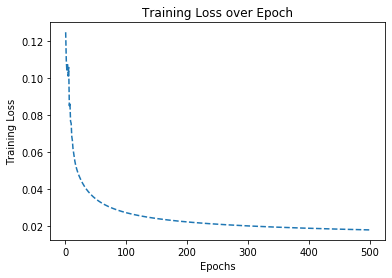

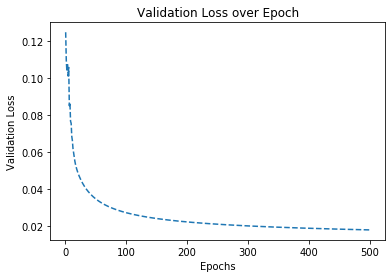

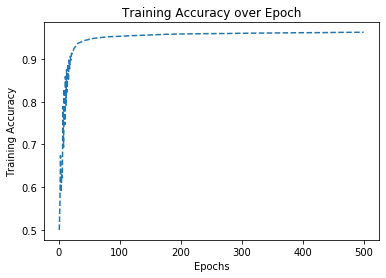

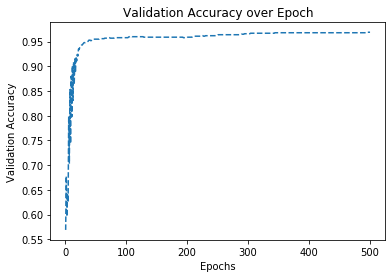

In [250]:
training_losses, validation_losses, training_accuracies, validation_accuracies, weights, biases = train(x_train_flattened, y_train, x_dev_flattened, y_dev, np.zeros((x_train_flattened.shape[0], )), 0, 500, 0.1, 5)

# prints the model parameters that minimise the MSE of the model
training_epoch = np.argmin(training_losses)
print("Weights that minimise the MSE of the model: ", weights[training_epoch])
print("Bias that minimises the MSE of the model: ", biases[training_epoch])

losses, validation_losses, training_accuracies, validation_accuracies, weights, biases = grid_search(x_train_flattened, y_train, x_dev_flattened, y_dev, np.zeros((x_train_flattened.shape[0], )), 0, 500, 5)
plot(losses, 'Epochs', 'Training Loss', 'Training Loss over Epoch', 'v_trainingLoss_epochs.png', 500)
plot(losses, 'Epochs', 'Validation Loss', 'Validation Loss over Epoch', 'v_validationLoss_epochs.png', 500)
plot(training_accuracies, 'Epochs', 'Training Accuracy', 'Training Accuracy over Epoch', 'v_trainingAcc_epochs.png', 500)
plot(validation_accuracies, 'Epochs', 'Validation Accuracy', 'Validation Accuracy over Epoch', 'v_validationAcc_epochs.png', 500)

In [75]:
grid_search(x_train_flattened, y_train, x_dev_flattened, y_dev, np.zeros((x_train_flattened.shape[0], )), 0, 500, 5)

The model has converged after 500 epochs.
The model has converged after 500 epochs.
The model has converged after 500 epochs.
The model has converged after 7 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
The model has converged after 11 epochs.
The model has converged after 500 epochs.
The model has converged after 13 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
The model has converged after 9 epochs.
The model has converged after 500 epochs.
Learning rate: 0.3
Weights: [[[ 3.53760587e-05  3.82204210e-05  4.85537478e-05 ...  2.91178524e-04
    1.35828469e-04  4.48557813e-05]]

 [[-3.73922787e-04 -3.69666193e-04 -3.53574473e-04 ... -3.28752112e-05
   -2.46767616e-04 -3.62395767e-04]]

 [[-3.30053559e-05 -2.56071617e-05  1.89229679e-06 ...  5.78079220e-04
    2.02047459e-04 -1.09159529e-05]]

 ...

 [[-2.62312097e-02 

(-1.6553629329507658e-06, -1.0164395367051604e-12)
500
weights that minimise the MSE of the model:  [[-1.19533279e-02 -1.19081835e-02 -1.14719831e-02 -1.10210680e-02
  -9.64005263e-03 -6.96497585e-03 -4.52628332e-03  1.11808029e-03
   7.37520541e-03  1.46778911e-02  2.34253414e-02  3.27185591e-02
   3.88622607e-02  4.51524551e-02  4.21149159e-02  2.09359951e-02
   1.24674246e-03 -6.51513942e-03 -3.75655811e-03 -1.72667142e-03
  -6.34414327e-03 -8.55137477e-03 -6.78257019e-03 -8.79407159e-03
  -1.07691360e-02 -1.08238783e-02 -1.25145902e-02 -1.18722305e-02
  -1.19408666e-02 -1.16056932e-02 -1.07139185e-02 -7.04663761e-03
  -1.18184900e-03  8.90622285e-03  1.88725902e-02  3.39776610e-02
   4.96187431e-02  7.01762327e-02  9.23651489e-02  1.08344052e-01
   1.17570960e-01  1.21397562e-01  1.03201500e-01  5.91593257e-02
   3.04272854e-02  1.59963537e-02  1.54397090e-02  1.81419091e-02
   1.20841556e-02  6.05664657e-03  2.45977000e-03 -1.71351391e-03
  -3.72829202e-03 -1.78912357e-03 -8.54396

Training accuracy on epoch 314 = 0.9539166666666666
Validation accuracy on epoch 314 = 0.961


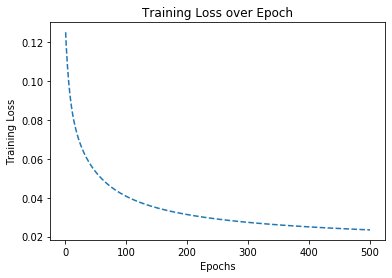

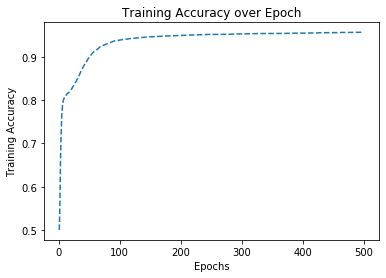

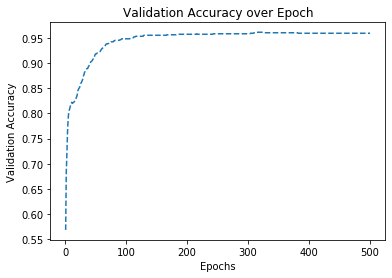

In [12]:
import numpy as np
from matplotlib import pyplot as plt

# @dataclass
class LogisticRegression:
    w: np.array
    b: float
    learning_rate: float
    n_epochs: int
    
    def __init__(self, weight, bias, learning_rate, n_epochs):
        self.w = weight
        self.b = bias
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
    
    def activation_function_input(self, w: np.array, x: np.array) -> np.array:
        """
        Calculate the input of activation function.
        --------------------
        w: current weight, of shape (1, 784)
        x: input data, of shape (784, n=12000)
        --------------------
        return: the output prediction
        """
        
        return w@x + self.b
    
    def predict(self, x) -> np.array:
        """
        Calculate the output prediction.
        --------------------
        x: input data, of shape (784, n=12000)
        --------------------
        return: the output prediction
        """
        
        activation_function_input = self.activation_function_input(self.w, x)
        
        return sigmoid(activation_function_input)
    
    def gradient(self, x, y)-> (np.array, np.array):
        """
        Calculate the gradients: dw and db
        --------------------
        x: input data, of shape (784, n=12000)
        y: true label vector, of shape (1, n)
        --------------------
        return: derivatives of loss function: L with respect to weight: w and bias: b
        """
        n = max(y.shape)
        
        p = self.predict(x)
        
        dy_hat = p-y
        dz = dy_hat*p*(1-p)
        
        dw = np.dot(dz, x.T)/n
        db = np.sum(dz)/n
        
        return (dw, db)
    
    def mean_squared_loss(self, y, y_pred) -> np.array:
        """
        Calculate the mean squared error.
        --------------------
        y: true label vector, of shape (1, n)
        y_pred: predicted label vector, of shape (1, n)
        --------------------
        return: mean squared loss
        """
        n = max(y.shape)
        return (y-y_pred)**2/(2*n)
    
    def finite_differences(self, x, y, delta_h=1e-5):
        """
        Calculate the finite difference.
        --------------------
        gradients: Current set of gradients
        learning_rate: parameter to guide SGD step size
        --------------------
        return: finite difference
        """
        
        n = max(y.shape)
        
        dw = self.gradient(x, y)[0]
        db = self.gradient(x, y)[1]
        
        w_plus = np.copy(self.w)
        w_minus = np.copy(self.w) 
        
        b_plus = self.b
        b_minus = self.b
        
        w_plus += delta_h/2
        w_minus -= delta_h/2
        
        b_plus += delta_h/2
        b_minus -= delta_h/2
        
        y_hat_plus_w = sigmoid(w_plus @ x + self.b)
        y_hat_minus_w = sigmoid(w_minus @ x + self.b)
        
        y_hat_plus_b = sigmoid(self.w @ x + b_plus)
        y_hat_minus_b = sigmoid(self.w @ x + b_minus)
    
        
        loss_plus_w = self.mean_squared_loss(y, y_hat_plus_w)
        loss_minus_w =  self.mean_squared_loss(y, y_hat_minus_w)
        
        loss_plus_b = self.mean_squared_loss(y, y_hat_plus_b)
        loss_minus_b =  self.mean_squared_loss(y, y_hat_minus_b)
        
        fd_dw = (loss_plus_w - loss_minus_w)/(delta_h)
        fd_db = (loss_plus_b - loss_minus_b)/(delta_h)
        
        difference_w = np.sum(dw) - np.sum(fd_dw)
        difference_b = np.sum(db) - np.sum(fd_db)
        
        return (difference_w, difference_b)
    
    def train(self, x, y, x_dev, y_dev, bound):
        # count the number of validation loss increments
        counter = 0
        
        losses = []
        training_accuracies = []
        validation_accuracies = []
        weights = []
        biases = []
        
        for i in range(self.n_epochs):
            y_hat = self.predict(x)
#             print(y_hat)
            dw, db = self.gradient(x, y)
            self.w = gradient_update(self.w, self.learning_rate, dw)
            self.b = gradient_update(self.b, self.learning_rate, db)
#             print(self.b)
            weights.append(self.w)
            biases.append(self.b)
            
            training_loss = np.sum(self.mean_squared_loss(y, y_hat))
            losses.append(training_loss)
            
            training_accuracy = self.accuracy(y, np.where(y_hat >= 0.5, 1.0, 0.0))
            training_accuracies.append(training_accuracy)
            
            y_dev_hat = self.predict(x_dev)
            
            validation_accuracy = self.accuracy(y_dev, np.where(y_dev_hat >= 0.5, 1.0, 0.0))
            validation_accuracies.append(validation_accuracy)
            
            validation_loss = np.sum(self.mean_squared_loss(y_dev, y_dev_hat))
            
            if i > 0 and validation_loss > prev_validation_loss:
                print("increment")
                counter += 1
            
            if counter == bound:
                print("reached bound")
                break
            #print(validation_loss)
            prev_validation_loss = validation_loss
        
        # 
        training_epoch = np.argmin(losses)
        print(training_epoch+1)
        print("weights that minimise the MSE of the model: ", weights[training_epoch])
        print("bias that minimises the MSE of the model: ", biases[training_epoch])
        return (losses, training_accuracies, validation_accuracies)
    
    def accuracy(self, y, y_hat):
        n = max(y_hat.shape)
        correct = np.sum(np.where(y == y_hat, 1.0, 0.0))
#         correct = np.sum(y_hat >= 0.5)
        return correct/n
    
    def plot(self, y_values, xlabel, ylabel, title, output_path):
        epochs = range(1, self.n_epochs+1)

        plt.figure()
        plt.plot(epochs, y_values, linestyle='--')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
#         plt.show()
        plt.savefig(output_path)

p = LogisticRegression(np.zeros((x_train_flattened.shape[0], )), 0, 0.1, 500)
print(p.finite_differences(x_train_flattened, y_train))
losses, training_accuracies, validation_accuracies = p.train(x_train_flattened, y_train, x_dev_flattened, y_dev, 5)
print(type(losses))
p.plot(losses, 'Epochs', 'Training Loss', 'Training Loss over Epoch', 'trainingLoss_epochs.png')
p.plot(training_accuracies, 'Epochs', 'Training Accuracy', 'Training Accuracy over Epoch', 'trainingAcc_epochs.png')
p.plot(validation_accuracies, 'Epochs', 'Validation Accuracy', 'Validation Accuracy over Epoch', 'validationAcc_epochs.png')

# training_epoch = np.argmax(training_accuracies)
validation_epoch = np.argmax(validation_accuracies)
print("Training accuracy on epoch {} = {}".format(validation_epoch+1, training_accuracies[validation_epoch]))
print("Validation accuracy on epoch {} = {}".format(validation_epoch+1, validation_accuracies[validation_epoch]))